<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

#### Project Overview: Analysis of Taxi Rides in Chicago

**Objective:**  
The primary goal of this project was to analyze taxi ride data in Chicago, focusing on two key aspects: the volume of rides for different taxi companies and the distribution of ride drop-offs across various neighborhoods in Chicago. The project involved data manipulation, exploratory data analysis, and hypothesis testing to derive insights about taxi ride patterns.

**Data Sources:**

- **Taxi Companies and Ride Volumes:**  
  This dataset (`project_sql_result_01.csv`) included information on different taxi companies and the number of rides they provided during a specific period in November 2017.

- **Neighborhood Drop-Offs:**  
  The second dataset (`project_sql_result_04.csv`) detailed the average number of rides ending in different Chicago neighborhoods for November 2017.

- **Ride Durations under Different Weather Conditions:**  
  A third dataset (`project_sql_result_07.csv`) provided data on rides from the Loop to O'Hare International Airport, including pickup times, weather conditions, and ride durations.

**Methodology:**

1. **Data Import and Validation:**  
   Initially, the datasets were imported and examined for data integrity and correctness of data types.

2. **Exploratory Data Analysis:**  
   Conducted a detailed analysis of the datasets to identify patterns, specifically focusing on the most popular neighborhoods for taxi drop-offs and the leading taxi companies based on the number of rides.

3. **Graphical Representation:**  
   Developed visual representations (graphs) to effectively communicate the findings, including identifying the top 10 neighborhoods by drop-off numbers and the comparative analysis of taxi companies based on ride volumes.

4. **Hypothesis Testing:**  
   Formulated and tested a hypothesis regarding the impact of weather conditions (rainy Saturdays) on the duration of rides from the Loop to O'Hare International Airport. This involved statistical analysis and deciding on an appropriate significance level (alpha).

**Key Findings and Conclusions:**

- The analysis revealed dominant taxi companies in terms of ride volumes, highlighting Flash Cab and Taxi Affiliation Services as market leaders.
- Top neighborhoods for drop-offs included the Loop, River North, and Streeterville, indicative of their popularity as destinations due to factors like central location and high activity levels.
- The project also provided insights into the effects of weather conditions on ride durations.

**Skills Demonstrated:**

- Proficiency in Python for data analysis, including libraries like Pandas and Matplotlib.
- Ability to conduct hypothesis testing and interpret statistical results.
- Competence in translating complex data into understandable and actionable insights.

**Value Delivered:**  
This project not only showcases analytical and technical skills but also demonstrates an ability to derive meaningful insights from real-world data, offering valuable information for strategic decision-making in urban transportation and taxi service operations.

</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Import Files
df = pd.read_csv('/datasets/project_sql_result_01.csv')
df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
#Import files
df_2 = pd.read_csv('/datasets/project_sql_result_04.csv')

#study the data they contain
df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
#study the data they contain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
#study the data they contain
print(df.isnull().sum()) 
print('-'*40)
print(df_2.isnull().sum())

company_name    0
trips_amount    0
dtype: int64
----------------------------------------
dropoff_location_name    0
average_trips            0
dtype: int64


In [7]:
#study the data they contain
#make sure the data types are correct

trip_amount_df = df
dropoffs_df = df_2

dropoffs_df['average_trips'] = dropoffs_df['average_trips'].astype(float)
dropoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">
Changed average_trips to float since float is the value type in that column. 
</div>

In [8]:
#identify the top 10 neighborhoods in terms of drop-offs

top_10_neighborhoods = dropoffs_df.nlargest(10, 'average_trips')
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


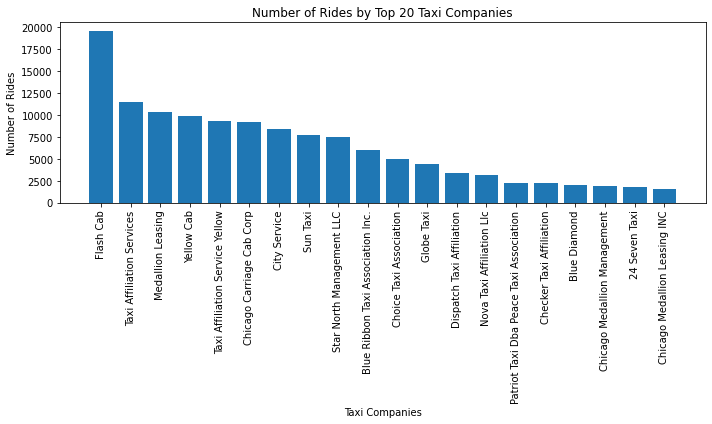

In [9]:
#make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

# Extract the data from trip_amount_df for the top 20 companies
top_20_companies = trip_amount_df.nlargest(20, 'trips_amount')
companies = top_20_companies['company_name']
rides_amount = top_20_companies['trips_amount']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(companies, rides_amount)
plt.xlabel('Taxi Companies')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Top 20 Taxi Companies')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

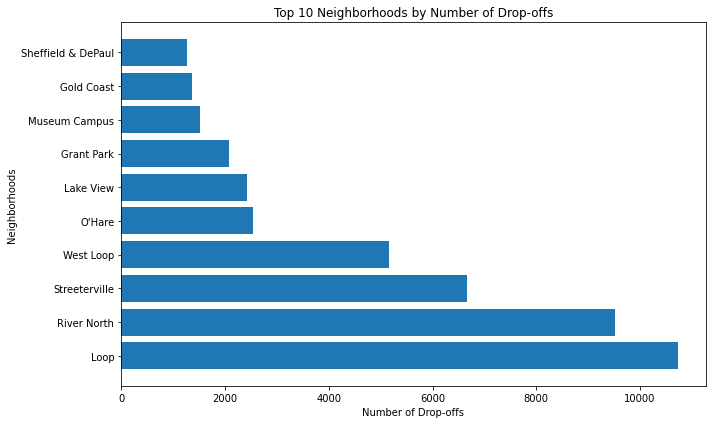

In [10]:
# Extract the data from the top_10_neighborhoods DataFrame
neighborhoods = top_10_neighborhoods['dropoff_location_name']
dropoff_counts = top_10_neighborhoods['average_trips']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(neighborhoods, dropoff_counts)
plt.xlabel('Number of Drop-offs')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

### Summary of Taxi Ride Analysis

- **Top Taxi Companies:**  
  The analysis shows that **Flash Cab** and **Taxi Affiliation Services** have the highest number of rides among the top 20 taxi companies. Their significantly higher ride volumes indicate their popularity and dominance in the market.

- **Gradual Decrease in Rides:**  
  As we move down the list of companies, there's a noticeable gradual decrease in the number of rides. This trend underscores the market concentration in the hands of the top companies.

- **Top Neighborhoods by Number of Drop-offs:**  
  The neighborhoods with the highest number of taxi drop-offs are **The Loop**, **River North**, and **Streeterville**, followed by the **West Loop** and **O'Hare**. Their high drop-off counts point towards their popularity as destinations, likely attributed to their central locations and vibrant activity levels encompassing commercial and entertainment areas.

- **Significance of O'Hare:**  
  O'Hare International Airport, being one of the top neighborhoods for drop-offs, emphasizes its role as a major transportation hub in Chicago.

- **Overall Insights:**  
  These findings reveal notable patterns and preferences in taxi usage. Flash Cab and Taxi Affiliation Services emerge as leading service providers. Simultaneously, areas like The Loop, River North, and Streeterville are key destinations, highlighting the demand dynamics for taxi services in Chicago. This information is crucial for understanding market needs and planning efficient taxi operations in the city.

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully! Nice analysis!

</div>

In [11]:
data = pd.read_csv('/datasets/project_sql_result_07.csv')
data.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
data['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [14]:
# Filter the data for rainy Saturdays
rainy_saturdays_data = data[(data['weather_conditions'] == 'Bad') & (pd.to_datetime(data['start_ts']).dt.weekday == 5)]

# Separate the duration data for rainy Saturdays and other days
rainy_saturdays_duration = rainy_saturdays_data['duration_seconds']
other_days_duration = data[(data['weather_conditions'] != 'Bad') | (pd.to_datetime(data['start_ts']).dt.weekday != 5)]['duration_seconds']

# Perform a t-test to compare the means of rainy Saturdays and other days
alpha = 0.05  # Significance level

_, p_value = stats.ttest_ind(rainy_saturdays_duration, other_days_duration, equal_var=False)

# Compare the p-value to the significance level
if p_value < alpha:
    print("The average duration of rides from the Loop to O'Hare International Airport significantly changes on rainy Saturdays.")
else:
    print("There is no significant difference in the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")

The average duration of rides from the Loop to O'Hare International Airport significantly changes on rainy Saturdays.


<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly, and appropriate test was used and the conclusion is consistent with test results

</div>